# Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaque During Rest and Movement

> **Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview
This notebook explores Dandiset 001174, which contains calcium imaging data from supplementary motor area (SMA) and primary motor cortex (M1) of rhesus macaques during rest and arm reaching tasks. The data was collected using one-photon calcium imaging with miniature microscopes.

**Dandiset Link**: [https://dandiarchive.org/dandiset/001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)

This notebook demonstrates:
- Loading and accessing NWB files from the dandiset
- Examining calcium imaging data structure
- Visualizing fluorescence signals and ROI data
- Working with imaging plane segmentation

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient

## Accessing the Dandiset

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Get the URL for a specific NWB file
asset_path = "sub-V/sub-V_ses-20230309T110929_ophys.nwb"
url = next(dandiset.get_assets_by_glob(asset_path)).download_url

## Loading the NWB File
We'll examine data from a calcium imaging session recorded in subject V during arm reaching.

In [3]:
# Open the remote file and create an NWB reader
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

## Data Structure Overview
The NWB file contains:
- Raw calcium imaging data (OnePhotonSeries)
- Processed fluorescence signals
- ROI (Region of Interest) segmentation
- Event amplitude data

In [4]:
# Print basic session information
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Session Description: {nwb.session_description}")
print(f"Imaging Rate: {nwb.acquisition['OnePhotonSeries'].rate} Hz")
print(f"Number of Frames: {nwb.acquisition['OnePhotonSeries'].data.shape[0]}")
print(f"Frame Dimensions: {nwb.acquisition['OnePhotonSeries'].data.shape[1:]} pixels")

Subject ID: V
Session Description: Calcium imaging in M1 during the arm reaching condition
Imaging Rate: 10.0 Hz
Number of Frames: 5185
Frame Dimensions: (1280, 800) pixels


## Visualizing Calcium Imaging Data

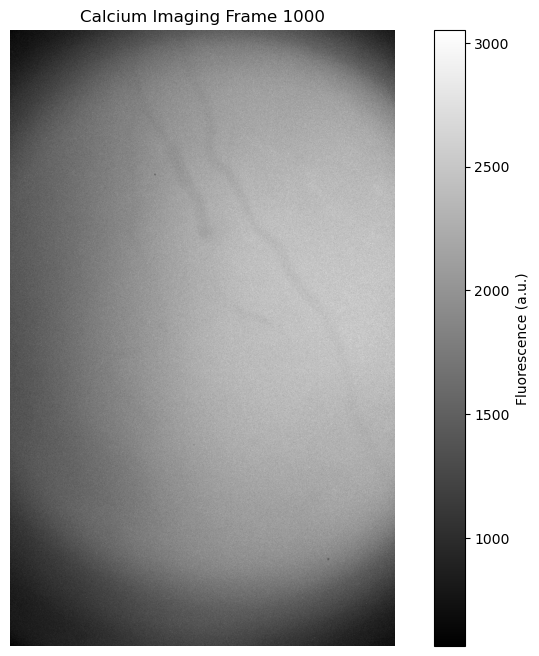

In [5]:
# Plot a single frame from the calcium imaging data
def plot_calcium_frame(frame_number=1000):
    plt.figure(figsize=(10, 8))
    frame = nwb.acquisition['OnePhotonSeries'].data[frame_number]
    plt.imshow(frame, cmap='gray')
    plt.colorbar(label='Fluorescence (a.u.)')
    plt.title(f'Calcium Imaging Frame {frame_number}')
    plt.axis('off')
    plt.show()

plot_calcium_frame()

## ROI Fluorescence Signals

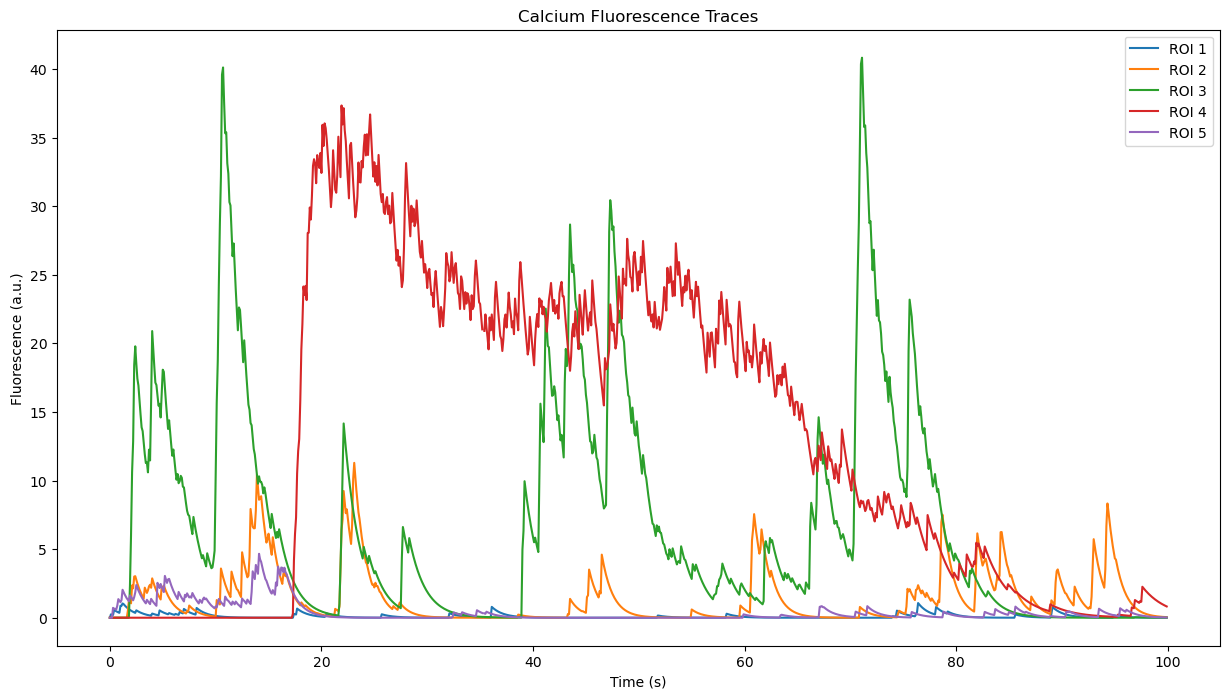

In [6]:
# Get fluorescence traces for all ROIs
fluorescence = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries']
f_traces = fluorescence.data[:1000]  # First 1000 timepoints

# Plot fluorescence traces for first 5 ROIs
plt.figure(figsize=(15, 8))
time = np.arange(f_traces.shape[0]) / fluorescence.rate
for i in range(5):
    plt.plot(time, f_traces[:, i], label=f'ROI {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Calcium Fluorescence Traces')
plt.legend()
plt.show()

## Event Detection Results

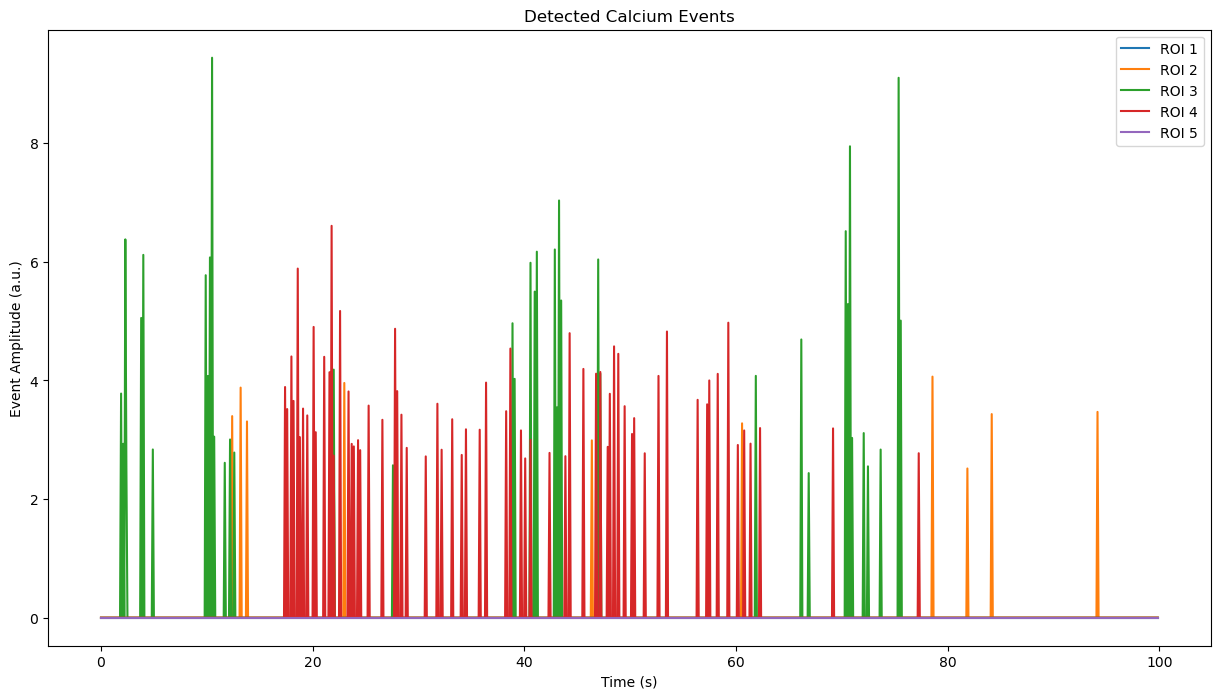

In [7]:
# Plot event amplitudes for the same ROIs
event_amplitude = nwb.processing['ophys'].data_interfaces['EventAmplitude']
e_traces = event_amplitude.data[:1000]  # First 1000 timepoints

plt.figure(figsize=(15, 8))
time = np.arange(e_traces.shape[0]) / event_amplitude.rate
for i in range(5):
    plt.plot(time, e_traces[:, i], label=f'ROI {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Event Amplitude (a.u.)')
plt.title('Detected Calcium Events')
plt.legend()
plt.show()

## Next Steps
With this notebook, you can:
- Load and examine calcium imaging data from different sessions
- Extract and analyze fluorescence traces from specific ROIs
- Study the temporal patterns of calcium events
- Investigate spatial relationships between ROIs

Potential analyses could include:
- Correlation analysis between ROIs
- Event detection and characterization
- Relationship between neural activity and behavioral events
- Comparison of activity patterns between SMA and M1 regions